### Adequação de modelos e regressão não linear

regressão com variaveis transformadas
b1_inf = (xy_sum - x_sum*y_sum/n) / (x_sum**2 - (x_sum**2)/n)
b0_inf = (y_sum - b1_inf*x_sum) / n

##### Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import math

from statsmodels.graphics.gofplots import ProbPlot
from scipy.stats import t
from numpy.core.fromnumeric import mean

##### Help functions

In [32]:
def df_residual(x, y):
    #create a new df for residual analysis
    #variable response = y

    #variable predict = x

    #predict variable response
    y_pred=list(modelo.predict())

    #sns.resid(modelo)
    resi=list(modelo.resid)

    #create instance influence
    influence = modelo.get_influence()

    #get standard residuals
    stdresid = list(influence.resid_studentized_internal)

    #e/e* verify proportionality between error and standard error
    prop=np.divide(resi,stdresid)

    #tabela geral
    df = pd.DataFrame(list(zip(x, y, y_pred, resi, stdresid, prop)),
                columns =['x', 'y', 'yc', 'e', 'e*', 'e/e*'])
    return df

##### Load dataset

In [33]:
df = pd.read_csv('data/carst.csv', delimiter=',')
df

,brand/model/year,cap_vol,consumo,power,weight,cemm,nu_cy,Etype
0,Gurgel BR800 0.8 1991,792,12.0,33,650,34.4,2,0
1,FIAT UNO Mille EP 1996,994,10.4,58,870,18.6,4,0
2,Hyundai HB20 Sense 2020,1000,12.8,80,989,14.5,3,0
3,FIAT Strada 1.4 2016,1368,10.3,86,1084,12.5,4,0
4,VolksWagen GOL 1.6 2015,1598,10.5,104,961,9.8,4,0
5,Chevrolet Cruze LTZ 1.8 2016,1796,8.5,144,1427,10.2,4,0
6,Honda Civic EXR 2016,1997,9.5,155,1294,10.9,4,0
7,Ford Focus 2.0 GLX 2012,1999,9.2,148,1347,10.4,4,0
8,BMW 325i 3.0 2012,2996,6.5,218,1460,7.1,6,0
9,AUDI A4 3.2 V6 Fsi 2011,3197,7.1,269,1610,6.4,6,0


##### 1. Faça uma análise de resíduos para carros do tipo 0 (dataset carst_csv)

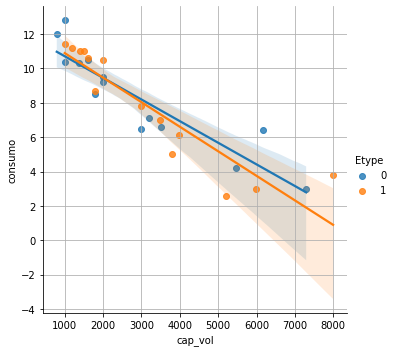

In [34]:
#graph dispersion (cap_vol x consumo)
sns.lmplot(x='cap_vol', y='consumo',hue='Etype', data=df);plt.grid(True)

In [35]:
#select cars type = 0
df1 = df[df['Etype'] == 0]
df1

,brand/model/year,cap_vol,consumo,power,weight,cemm,nu_cy,Etype
0,Gurgel BR800 0.8 1991,792,12.0,33,650,34.4,2,0
1,FIAT UNO Mille EP 1996,994,10.4,58,870,18.6,4,0
2,Hyundai HB20 Sense 2020,1000,12.8,80,989,14.5,3,0
3,FIAT Strada 1.4 2016,1368,10.3,86,1084,12.5,4,0
4,VolksWagen GOL 1.6 2015,1598,10.5,104,961,9.8,4,0
5,Chevrolet Cruze LTZ 1.8 2016,1796,8.5,144,1427,10.2,4,0
6,Honda Civic EXR 2016,1997,9.5,155,1294,10.9,4,0
7,Ford Focus 2.0 GLX 2012,1999,9.2,148,1347,10.4,4,0
8,BMW 325i 3.0 2012,2996,6.5,218,1460,7.1,6,0
9,AUDI A4 3.2 V6 Fsi 2011,3197,7.1,269,1610,6.4,6,0


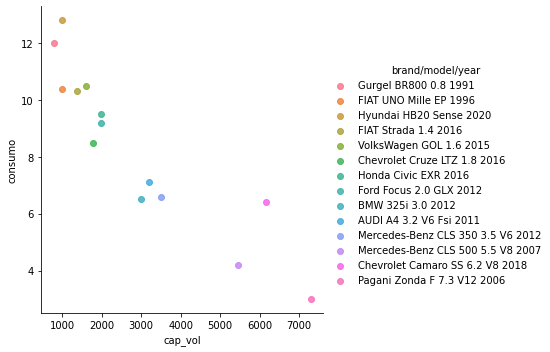

In [36]:
#dispersion graph
sns.lmplot(x='cap_vol', y='consumo',hue='brand/model/year', data=df1);

In [37]:
#Regression results
#select a response variable
y = df1['consumo']

#select a predict variable
x = df1['cap_vol']

#add a predict constant
x = sm.add_constant(x)

#fit linear regression model
modelo = sm.OLS(y, x).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                consumo   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     60.33
Date:                Tue, 03 May 2022   Prob (F-statistic):           5.08e-06
Time:                        14:17:54   Log-Likelihood:                -21.429
No. Observations:                  14   AIC:                             46.86
Df Residuals:                      12   BIC:                             48.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.9686      0.566     21.145      0.0

/home/felipe_oliveira/data-science/Statistical Modeling and Inference/statistical-modeling-inference/venv/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [38]:
#equation of straight line
b=modelo.params
b0=b[0]                     #intercepto
b1=b[1]                     #inclinação
print('y= {0}{1} x'.format(b0,b1))

y= 11.968578736702083-0.00125931162205358 x


In [39]:
#confidence interval b0 and b1
a = modelo.conf_int(alpha=0.05, cols=None)
a

,0,1
const,10.735300,13.201858
cap_vol,-0.001613,-0.000906


In [40]:
#create a df for residual analysis
dft = df_residual(df1['cap_vol'], df1['consumo'])
dft

,x,y,yc,e,e*,e/e*
0,792,12.0,10.971204,1.028796,0.923383,1.114160
1,994,10.4,10.716823,-0.316823,-0.281988,1.123532
2,1000,12.8,10.709267,2.090733,1.860422,1.123795
3,1368,10.3,10.245840,0.054160,0.047584,1.138197
4,1598,10.5,9.956199,0.543801,0.474716,1.145529
5,1796,8.5,9.706855,-1.206855,-1.048677,1.150836
6,1997,9.5,9.453733,0.046267,0.040048,1.155287
7,1999,9.2,9.451215,-0.251215,-0.217440,1.155327
8,2996,6.5,8.195681,-1.695681,-1.457151,1.163696
9,3197,7.1,7.942559,-0.842559,-0.724684,1.162657


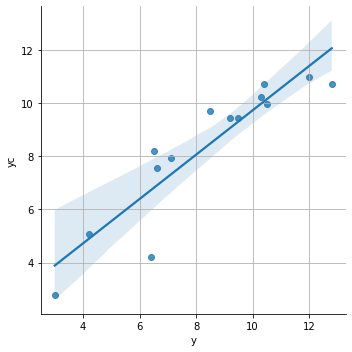

In [41]:
#graph (y x yc)
sns.lmplot(x='y', y='yc', data=dft);plt.grid(True)

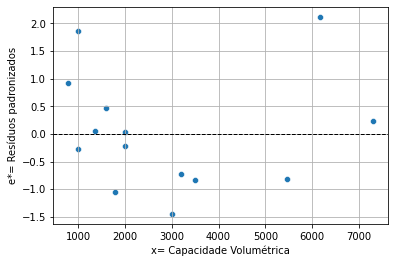

In [42]:
#graph (e* x x)
sns.scatterplot(x='x', y='e*', data=dft);plt.grid(True)
plt.xlabel('x= Capacidade Volumétrica')
plt.ylabel('e*= Resíduos padronizados')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.show()

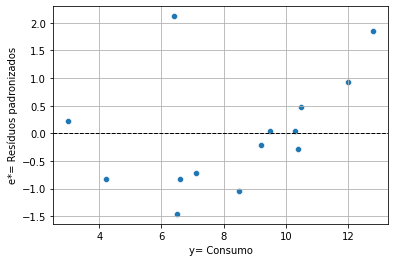

In [43]:
#graph (e* x y)
sns.scatterplot(x='y', y='e*', data=dft);plt.grid(True)
plt.xlabel('y= Consumo')
plt.ylabel('e*= Resíduos padronizados')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.show()

/home/felipe_oliveira/data-science/Statistical Modeling and Inference/statistical-modeling-inference/venv/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


Text(0, 0.5, 'Resíduos padronizados')

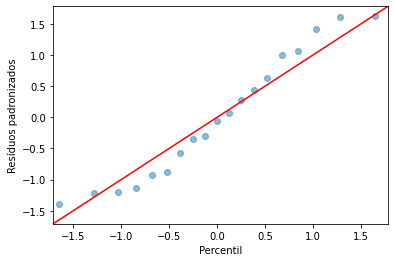

In [77]:
#graph V(normal distribution)
influence = modelo.get_influence()
QQ = ProbPlot(influence.resid_studentized_internal)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.axes[0].set_xlabel('Percentil')
plot_lm_2.axes[0].set_ylabel('Resíduos padronizados')

#### 2.  Os seguintes dados: x=tempo de fritura (s) e y= teor de umidade (%).


##### a.   Construa um gráfico de dispersão de y versus x e comente.

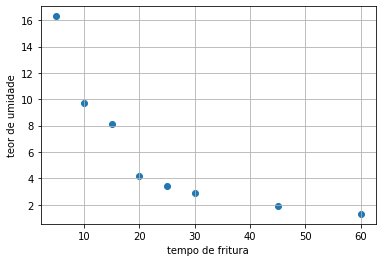

In [ ]:
#data
x = [5, 10, 15, 20, 25, 30, 45, 60]
y= [16.3, 9.7, 8.1, 4.2, 3.4, 2.9, 1.9, 1.3]

#create df
df3 = pd.DataFrame({'x':x, 'y':y})

#dispersion graph (x x y)
plt.scatter(df3['x'], df3['y'])
plt.xlabel('tempo de fritura')
plt.ylabel('teor de umidade')
plt.grid(True)
plt.show()

##### b.   Construa um gráfico de dispersão dos pares (ln(x), ln(y)) e comente.

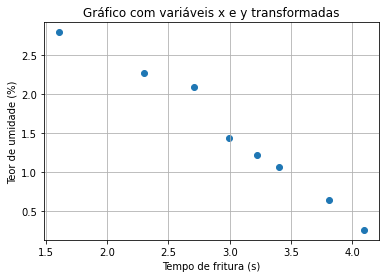

In [ ]:
#linearization
vtx=np.log(df3['x'])
vty=np.log(df3['y'])

#dispersion graph
plt.scatter(vtx, vty)
plt.xlabel('Tempo de fritura (s)');
plt.ylabel('Teor de umidade (%)')
plt.title('Gráfico com variáveis x e y transformadas')
plt.grid(True)
plt.show()

In [ ]:
#df comparison
df4 = pd.DataFrame({'x':x, 'y':y, 'ln_x':vtx, 'ln_y':vty})
df4

,x,y,ln_x,ln_y
0,5,16.3,1.609438,2.791165
1,10,9.7,2.302585,2.272126
2,15,8.1,2.708050,2.091864
3,20,4.2,2.995732,1.435085
4,25,3.4,3.218876,1.223775
5,30,2.9,3.401197,1.064711
6,45,1.9,3.806662,0.641854
7,60,1.3,4.094345,0.262364


##### c.   Qual é a relação probabilística entre x e y sugerido pelo padrão linear no gráfico da parte (b)?

In [ ]:
#Regression results
#select a response variable
y = vty

#select a predict variable
x = vtx

#add a predict constant
x = sm.add_constant(x)

#fit linear regression model
modelo = sm.OLS(y, x).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     239.1
Date:                Tue, 03 May 2022   Prob (F-statistic):           4.63e-06
Time:                        14:16:19   Log-Likelihood:                 5.2525
No. Observations:                   8   AIC:                            -6.505
Df Residuals:                       6   BIC:                            -6.346
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6384      0.211     21.978      0.0

/home/felipe_oliveira/data-science/Statistical Modeling and Inference/statistical-modeling-inference/venv/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
# parâmetros da reta intrinsecamente linear
b=modelo.params
b0=b[0] #intercepto
b1=b[1] #inclinação
print('y= {0}{1} x'.format(b0,b1))

y= 4.638414883849997-1.049198121311452 x


##### d.   Preveja o valor do teor de umidade ao fritar as batatas por 20s, de uma forma que transmite informações sobre confiabilidade e precisão.

In [ ]:
#t_student
alpha = 0.05                #nível de significia = 5% 
df = len(x) - 2             #gl (n - 2)                                     
t_student = t.ppf(1 - alpha/2, df) 
print('t=: {}'.format(t_student)) 

t=: 2.4469118487916806


In [ ]:
x=df3['x']
y=df3['y']
vtx=np.log(x)
vty=np.log(y)
y_pred=list(modelo.predict())

#sns.resid(modelo)
resi=(modelo.resid)

#SQE = sum(y - y_inf)
sqe = np.sum(resi*resi) 

#s2 = sqe/n-2
gl = modelo.df_resid
s2 = sqe/gl

#s
s = pow(s2, 1/2)

sqe, s2, s

(0.1259894484543931, 0.02099824140906552, 0.14490769961967348)

In [46]:
#sy_inf = s * pow(((1/n) + ((vtxs-vtxm)**2)/sxx), 1/2)
#x* = ln(20)
vtxs = np.log(20)

#x mean
vtxm = vtx.mean()                 

#n
n = modelo.df_resid + 2

#sxx
xx = np.sum(vtx*vtx)
xau = np.sum(vtx)
sxx = xx-xau * xau/n

#sy_inf
sy_inf = s * pow(((1/n)+(vtxs-vtxm)*(vtxs-vtxm)/sxx),1/2)
sy_inf


0.03873167543010773

In [47]:
#valor esperado de x = 20 deve ser usado como ln20(vtxs)
yln20 = b0 + (b1*vtxs)
yln20

11.964806176233436

In [49]:
#intervalo de previsão
sy_ip = np.sqrt((s2) + (sy_inf**2))

#desvio padrao calculado
ip = t_student * sy_ip

#ip linearized model
ip_yln20 = ([yln20 - ip, yln20 + ip])

#ip in original model(exponential)
#interval 1
ip_yexp200=pow(math.e,ip_yln20[0])

#interval 2
ip_yexp201=pow(math.e,ip_yln20[1])
ip_yln20, ip_yexp200, ip_yexp201

([11.597782579110135, 12.331829773356738],
 108856.15155372194,
 226801.34323174114)

##### e.   Analise os resíduos do ajuste do modelo de regressão linear para os dados transformados e comente.

In [50]:
dft2 = df_residual(vtx, vty)
dft2

,x,y,yc,e,e*,e/e*
0,1.609438,2.791165,10.971204,1.028796,0.923383,1.114160
1,2.302585,2.272126,10.716823,-0.316823,-0.281988,1.123532
2,2.708050,2.091864,10.709267,2.090733,1.860422,1.123795
3,2.995732,1.435085,10.245840,0.054160,0.047584,1.138197
4,3.218876,1.223775,9.956199,0.543801,0.474716,1.145529
5,3.401197,1.064711,9.706855,-1.206855,-1.048677,1.150836
6,3.806662,0.641854,9.453733,0.046267,0.040048,1.155287
7,4.094345,0.262364,9.451215,-0.251215,-0.217440,1.155327


In [51]:
#normal distribution
QQ = ProbPlot(influence.resid_studentized_internal)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.axes[0].set_xlabel('Percentil')
plot_lm_2.axes[0].set_ylabel('Resíduos padronizados')

NameError: name 'influence' is not defined

#### 3. Os dados a seguir: índice de massa de queima(x) e o comprimento da chama(y)

##### a. Estime os parâmetros do modelo de função potência

In [126]:
x = [1.7, 2.2, 2.3, 2.6, 2.7, 3.0, 3.2, 3.3, 4.1, 4.3, 4.6, 5.7, 6.1]
y = [1.3, 1.8, 1.6, 2.0, 2.1, 2.2, 3.0, 2.6, 4.1, 3.7, 5.0, 5.8, 5.3]

vtx = np.log(x)
vty = np.log(y)

df5 = pd.DataFrame({'x':x, 'y':y, 'ln_x':vtx, 'ln_y':vty})

#Regression results
#add a predict constant
vtx = sm.add_constant(vtx)

#fit linear regression model
modelo = sm.OLS(vty, vtx).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     261.5
Date:                Fri, 22 Apr 2022   Prob (F-statistic):           5.15e-09
Time:                        11:08:16   Log-Likelihood:                 12.264
No. Observations:                  13   AIC:                            -20.53
Df Residuals:                      11   BIC:                            -19.40
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4676      0.097     -4.836      0.0

/home/felipe_oliveira/data-science/Statistical Modeling and Inference/statistical-modeling-inference/venv/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [127]:
#equation of straight line
b=modelo.params
b0=b[0]                     #intercepto
b1=b[1]                     #inclinação
print('y= {0}+{1} x'.format(b0,b1))

y= -0.4676194453983054+1.2535562199105885 x


In [128]:
#original representation
b0 = pow(math.e, b0)
print('y = {}x^{}'.format(b0, b1))

y = 0.626491892671147x^1.2535562199105885


##### b. Construa gráficos de diagnóstico para verificar se uma função de potência é um modelo apropriado

In [129]:
vtx = np.log(x)
vty = np.log(y)

dft5 = df_residual(vtx, vty)
dft5

,x,y,yc,e,e*,e/e*
0,0.530628,0.262364,0.197553,0.064811,0.771906,0.083963
1,0.788457,0.587787,0.520756,0.067030,0.718614,0.093277
2,0.832909,0.470004,0.576479,-0.106475,-1.128347,0.094364
3,0.955511,0.693147,0.730168,-0.037021,-0.382985,0.096664
4,0.993252,0.741937,0.777477,-0.035540,-0.365738,0.097174
5,1.098612,0.788457,0.909553,-0.121095,-1.234118,0.098123
6,1.163151,1.098612,0.990455,0.108157,1.099536,0.098366
7,1.193922,0.955511,1.029029,-0.073518,-0.747197,0.098392
8,1.410987,1.410987,1.301132,0.109855,1.133441,0.096922
9,1.458615,1.308333,1.360836,-0.052504,-0.545758,0.096203


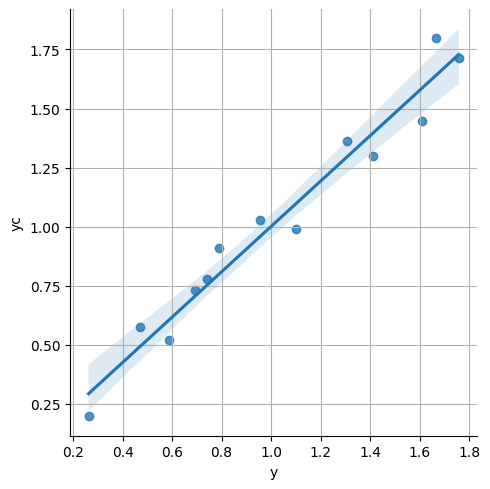

In [130]:
#graph (y x yc)
sns.lmplot(x='y', y='yc', data=dft5);plt.grid(True)

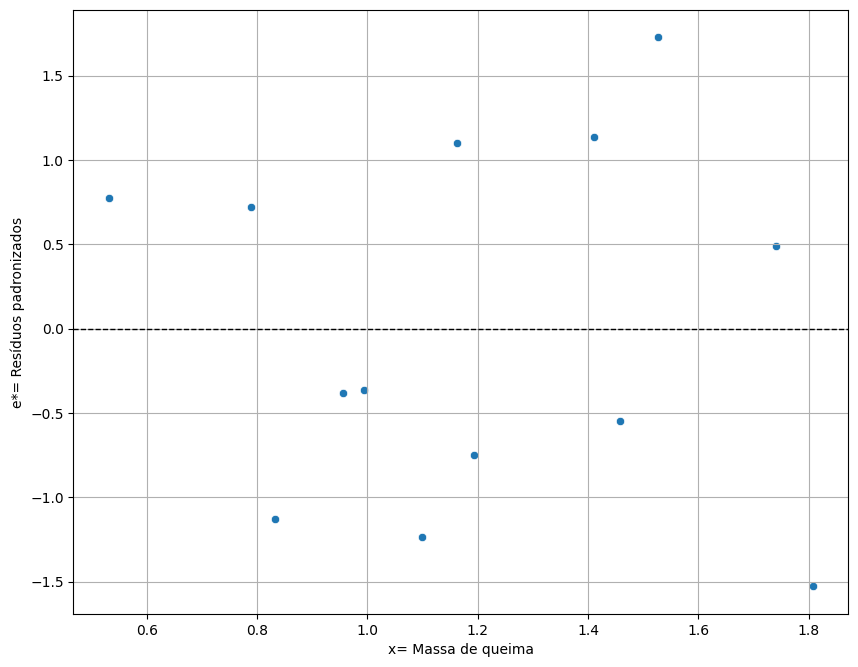

In [131]:
#graph (e* x x)
sns.scatterplot(x='x', y='e*', data=dft5);plt.grid(True)
plt.xlabel('x= Massa de queima')
plt.ylabel('e*= Resíduos padronizados')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.show()

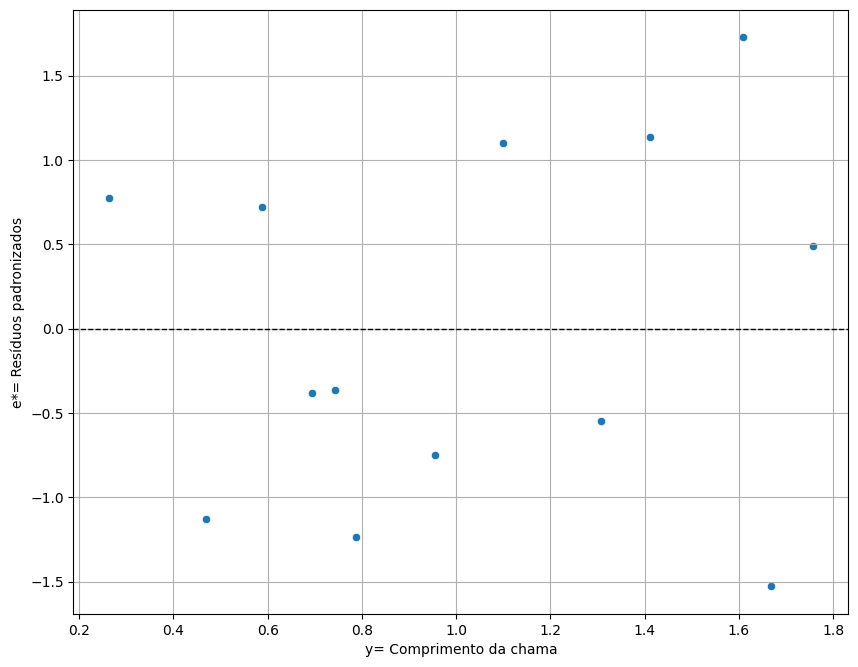

In [132]:
#graph (e* x y)
sns.scatterplot(x='y', y='e*', data=dft5);plt.grid(True)
plt.xlabel('y= Comprimento da chama')
plt.ylabel('e*= Resíduos padronizados')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.show()

/home/felipe_oliveira/data-science/Statistical Modeling and Inference/statistical-modeling-inference/venv/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


Text(0, 0.5, 'Resíduos padronizados')

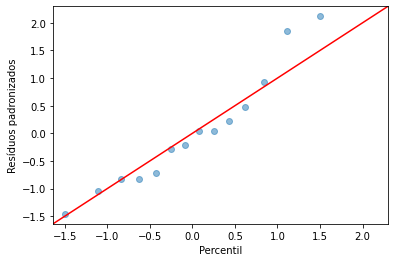

In [52]:
#graph V(normal distribution)
influence = modelo.get_influence()
QQ = ProbPlot(influence.resid_studentized_internal)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.axes[0].set_xlabel('Percentil')
plot_lm_2.axes[0].set_ylabel('Resíduos padronizados')

#### 4. Uma amostra de 20 observações, foi submetida ao processo de determinação da reta de regressão. Quando a variável preditora adota o valor de 3,5, a variável resposta adota o valor de 15. Após a obtenção da reta verifica-se que o valor esperado de da variável resposta para esse valor de 3,5 é 14,23. O valor médio da variável preditora é 2,2, o Sxx = 548 e o desvio padrão estimado s=0,98. Com todos estes dados calcular o valor do resíduo padronizado para a o dado especificado no problema.

In [55]:
n = 20
x = 3.5
y = 15
y_inf = 14.23
x_mean = 2.2
sxx = 548
s = 0.98

#fórmula para calculo do resíduo padronizado (obter resultado sem utilizar a função)
e_std = y - y_inf / s * pow(1 - (1/n) - ((x - x_mean)**2/sxx),1/2)
e_std

0.8702471582326528

#### 5. Um conjunto de dados foi coletado e e visto que eles tem a caraterística de ser representados por um modelo logarítmico. Dito conjunto observa-se na seguinte tabela. Realizando a transformação de variáveis adequada para o modelo logarítmico, qual é o conjunto de dados adequado?

In [7]:
#Transforma apenas x
x = [1, 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 10 , 11, 12]
y = [3.8, 4.5, 4.7, 5.0, 5.1, 5.5, 5.6, 5.9, 6.0, 6.2, 6.5, 6.6]
vtx = np.log(x)
df = pd.DataFrame({'y':y, 'vtx':vtx})
df

,y,vtx
0,3.8,0.000000
1,4.5,0.693147
2,4.7,1.098612
3,5.0,1.386294
4,5.1,1.609438
5,5.5,1.791759
6,5.6,1.945910
7,5.9,2.079442
8,6.0,2.197225
9,6.2,2.302585


#### 6. O artigo “Effect of crystal orientation on fatigue failure of single crystal nickel base turbine blade superalloys” (J. of Engineering for Gas Turbines and Power, 2002: 161-176) apresentou os dados a seguir e ajustou um modelo de regressão não linear a fim de prever a amplitude do esforço dos ciclos em motores de avião até uma falha ocorrer. 

In [82]:
x = (1326,1593,4414,5673,29516,26,843,1016,3410,7101,7356,7904,79,4175,34676,114789,2672,7532,30220)
y = (0.01495,0.01470,0.01100,0.01190,0.00873,0.01819,0.00810,0.00801,0.00600,0.00575,0.00576,0.00580,0.01212,0.00782,0.00596,0.00600,0.00880,0.00883,0.00676)
vtx = np.log(x)
vty = np.log(y)

#construir o DataFrame e nomear as colunas
df = pd.DataFrame(list(zip(vtx, y)), columns =["ln_x","y"])
vtx = df['ln_x']
y = df['y']

#Regressão linear com as variáveis transformadas
vtx  = sm.add_constant(vtx)
modelo = sm.OLS(y, vtx ).fit() #atenção esta variável será usada no IC

# parâmetros da reta
b=modelo.params
b0=b[0] #intercepto
b1=b[1] #inclinação
print("Função intrinsecamente linear y= {0}{1}x'".format(b0,b1))

#RESULTADO
y = b0 + (b1 * np.log(2710))
print('valor previsto para x = 2710: y = {}'.format(y))

Função intrinsecamente linear y= 0.019709249726031424-0.0012805224969148728x'
valor previsto para x = 2710: y = 0.009587098532865046
